## Drzewa decyzyjne

In [28]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
url='https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt'
df=pd.read_csv(url,header=None)
df.columns=['Size','Bedrooms','Price']
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [8]:
X = df[['Size', 'Bedrooms']]
y = df['Price']

In [9]:
X.values[:5]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]])

In [10]:
y.values[:5]

array([399900, 329900, 369000, 232000, 539900])

In [12]:
model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor()

In [13]:
predict_data = np.array([[3200,3], [3720, 2]])
predict_data

array([[3200,    3],
       [3720,    2]])

In [14]:
model.predict(predict_data)

/Users/mateusz/Documents/Code/data-science-bootcamp/final-venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([579900., 573900.])

In [36]:
model = DecisionTreeRegressor(
        max_depth=3,
        min_samples_leaf=5,
# Parametry ważne:
    # depth
    # min sample leaf 
    # 
        )

In [37]:
model.fit(X, y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

In [38]:
model.predict(predict_data)

/Users/mateusz/Documents/Code/data-science-bootcamp/final-venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([590266.66666667, 590266.66666667])

## Wizualizacja drzewa

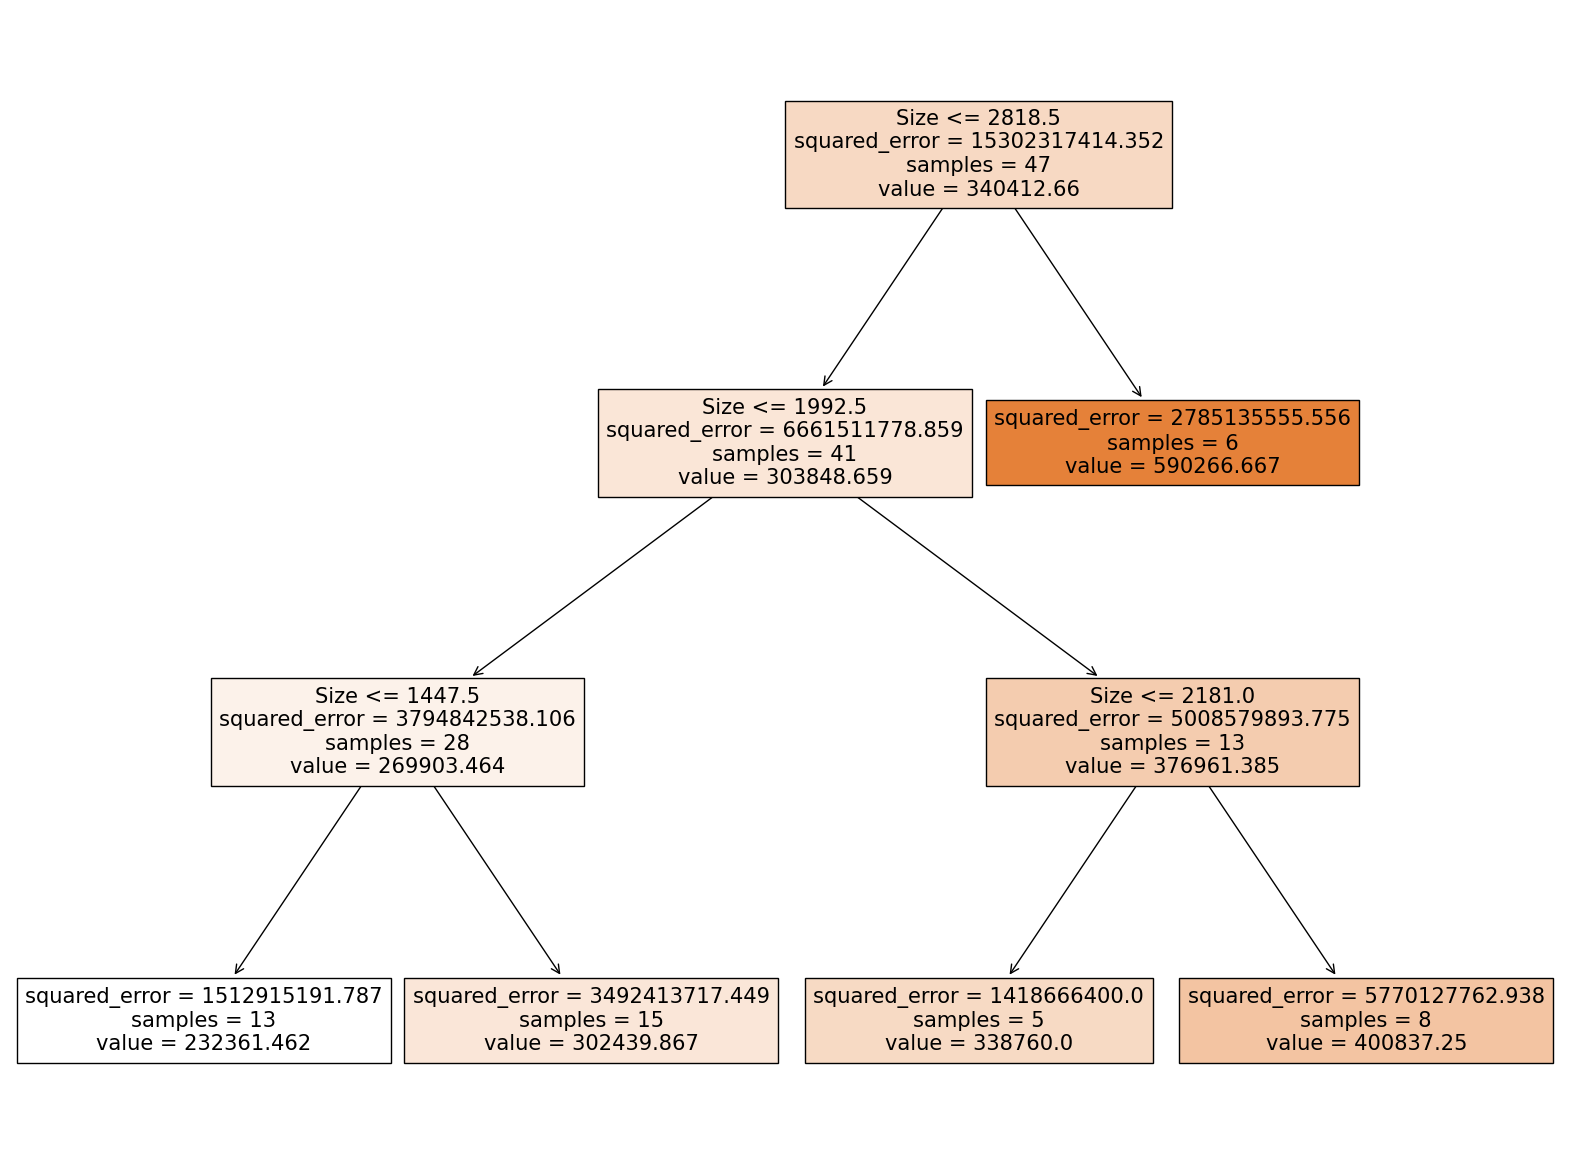

In [39]:
from sklearn import tree
fig = plt.figure(figsize=(20,15))
_=tree.plot_tree(model,feature_names=X.columns,filled=True)

In [42]:
# value = 232361
# value = 338760
# value = 400837
# value = 572933
# value = 607600

In [47]:
feature_imprtance = model.tree_.compute_feature_importances(normalize=False)
feature_imprtance = pd.concat([X.columns.to_series().reset_index(drop=True), pd.Series(feature_imprtance)], axis=1)
feature_imprtance = feature_imprtance.sort_values(feature_imprtance.columns[1], ascending=False)
feature_imprtance

,0,1
0,Size,1.228063e+10
1,Bedrooms,0.000000e+00


In [97]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Cookbook/master/Chapter01/bike_day.csv'
df = pd.read_csv(url)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [98]:
X = df[['atemp', 'hum', 'windspeed']]
y = df['cnt']

In [99]:
X.values[:5]

array([[0.363625, 0.805833, 0.160446],
       [0.353739, 0.696087, 0.248539],
       [0.189405, 0.437273, 0.248309],
       [0.212122, 0.590435, 0.160296],
       [0.22927 , 0.436957, 0.1869  ]])

In [100]:
y.values[:5]

array([ 985,  801, 1349, 1562, 1600])

In [136]:
min_num = int(0.1*df.shape[0])

model = DecisionTreeRegressor(
        max_depth=5,
        min_samples_split= min_num
        )

min_num

73

In [123]:
model.fit(X, y)

DecisionTreeRegressor(max_depth=5, min_samples_split=73)

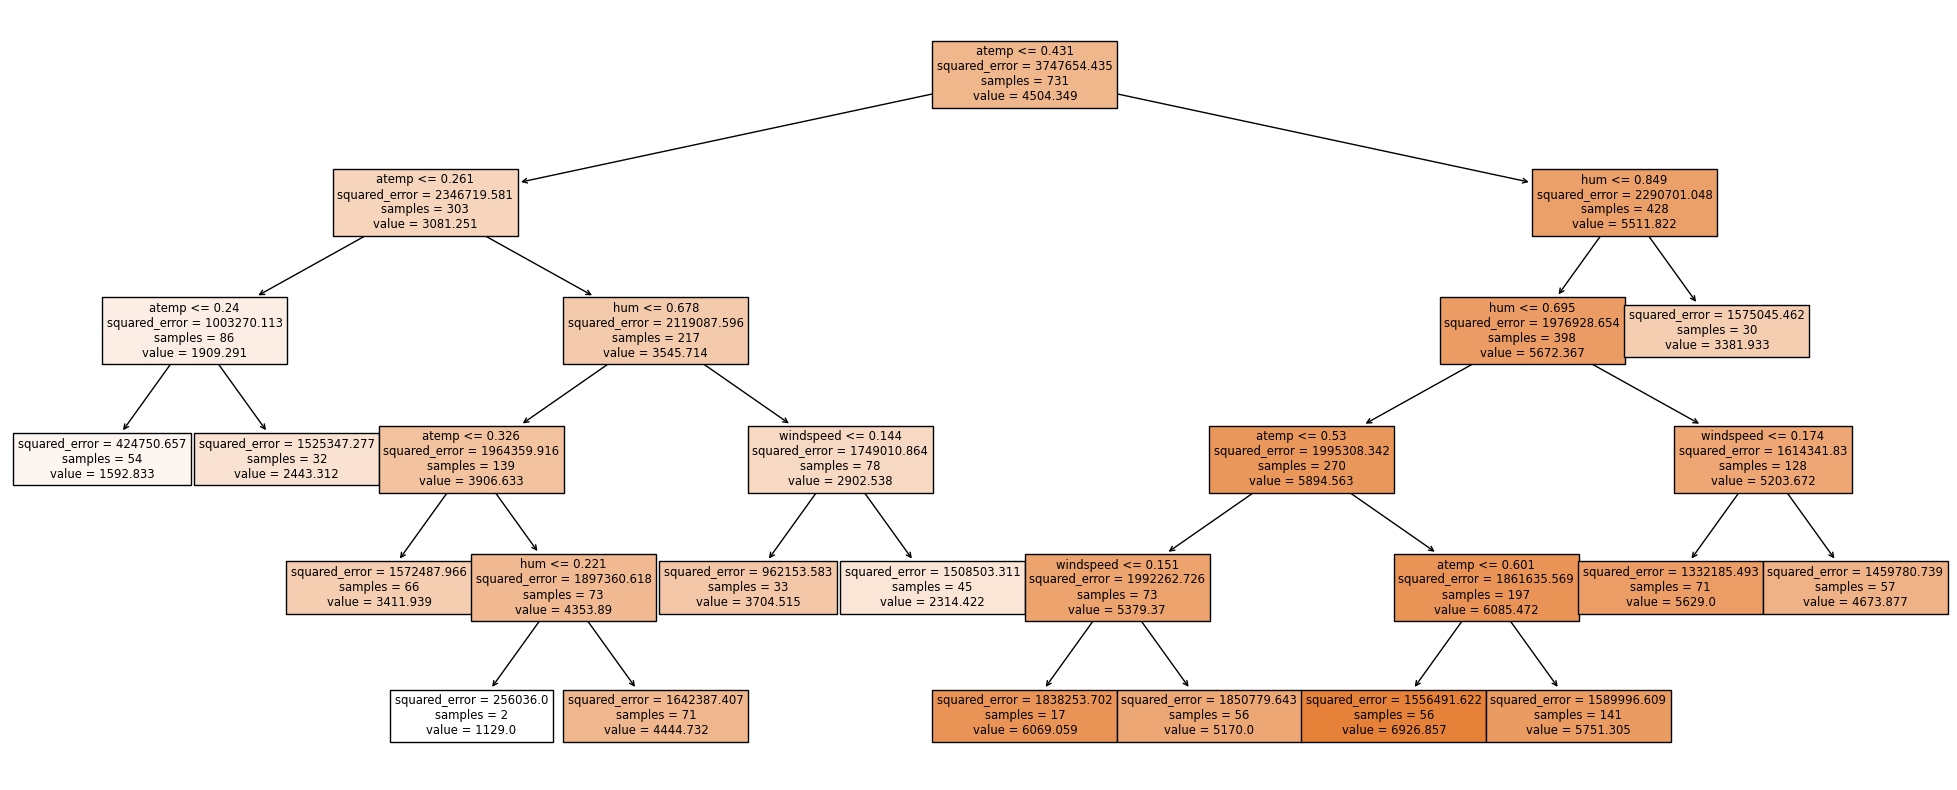

In [132]:
from sklearn import tree

fig = plt.figure(figsize=(25,10))
_=tree.plot_tree(model,feature_names=X.columns,filled=True)

In [133]:
predict_data = np.array([[0.3, 0.3, 0.3]])

In [134]:
model.predict(predict_data)

/Users/mateusz/Documents/Code/data-science-bootcamp/final-venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([3411.93939394])

In [158]:
feature_imprtance = model.tree_.compute_feature_importances(normalize=False)
feature_imprtance = pd.concat([X.columns.to_series().reset_index(drop=True), pd.Series(feature_imprtance)], axis=1)
feature_imprtance = feature_imprtance.sort_values(feature_imprtance.columns[1], ascending=False)
feature_imprtance

AttributeError: 'LinearRegression' object has no attribute 'tree_'

### Zadanie 7

Wykorzystując uzyskany model regresyjny przepowiedz liczbę włamań na tysiąc mieszkańców dla dzielnic, w których występują średnio kolejno: 10, 20 i 50 pożarów na tysiąc gospodarstw domowych.

### Zadanie 8

Wytrenuj model regresyjny drzewa decyzyjnego i dokonaj predykcji dla tych samych wartości pożarów na tysiąc gospodarstw domowych co wyżej. Porównaj otrzymane wyniki.